In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import xml.etree.ElementTree as ET

In [2]:
# Function to plot a single image with its bounding box
# Function to plot a single image with its bounding boxes
def plot_image_with_bbox(ax, img_path, label_path):
    # Open the image
    image = Image.open(img_path)

    # Read all YOLO labels
    with open(label_path, "r") as f:
        labels = f.readlines()

    # Plot the image
    ax.imshow(image)
    ax.axis("off")  # Hide axes

    # Get image dimensions
    image_width, image_height = image.size

    # Loop through each label and draw the bounding box
    for label in labels:
        label = label.strip().split()
        class_id, x_center, y_center, w, h = map(float, label)

        # Convert normalized YOLO coordinates to pixel coordinates
        x_center *= image_width
        y_center *= image_height
        w *= image_width
        h *= image_height

        # Calculate the top-left corner of the bounding box
        x_min = x_center - w / 2
        y_min = y_center - h / 2

        # Add the bounding box
        rect = patches.Rectangle(
            (x_min, y_min), w, h, linewidth=1, edgecolor="red", facecolor="none"
        )
        ax.add_patch(rect)
        
def plot_image_with_xml_bbox(ax, img_path, xml_path):
    # Open the image
    image = Image.open(img_path)
    
    # Parse XML
    tree = ET.parse(xml_path)
    root = tree.getroot()
    
    # Plot the image
    ax.imshow(image)
    ax.axis("off")

    # Get image dimensions from XML
    width = int(root.find('width').text)
    height = int(root.find('height').text)

    # Extract all word bounding boxes
    for line in root.findall('.//line'):
        for word in line.findall('word'):
            bbox = word.find('bbox')
            x1 = float(bbox.get('x1'))
            y1 = float(bbox.get('y1'))
            x2 = float(bbox.get('x2'))
            y2 = float(bbox.get('y2'))
            
            # Create rectangle
            rect = patches.Rectangle(
                (x1, y1), x2-x1, y2-y1, 
                linewidth=1, edgecolor="red", facecolor="none"
            )
            ax.add_patch(rect)

# Display 9 images in a 3x3 grid
def display_images_in_grid_txt(image_dir, label_dir, start_index=0):
    fig, axes = plt.subplots(3, 3, figsize=(12, 12))
    axes = axes.flatten()

    for i in range(9):
        img_path = f"{image_dir}/img_{start_index + i:05d}.png"
        label_path = f"{label_dir}/img_{start_index + i:05d}.txt"

        try:
            plot_image_with_bbox(axes[i], img_path, label_path)
        except Exception as e:
            print(f"Error loading {img_path} or {label_path}: {e}")
            axes[i].axis("off")  # Hide the subplot if there's an error

    plt.tight_layout()
    plt.show()

# Display 9 images in a 3x3 grid
def display_images_in_grid_xml(image_dir, label_dir, start_index=0):
    fig, axes = plt.subplots(3, 3, figsize=(12, 12))
    axes = axes.flatten()

    for i in range(9):
        img_path = f"{image_dir}/img_{start_index + i:05d}.png"
        # label_path = f"{label_dir}/img_{start_index + i:05d}.txt"
        label_path = f"{label_dir}/img_{start_index + i:05d}.xml"

        try:
            # plot_image_with_bbox(axes[i], img_path, label_path)
            plot_image_with_xml_bbox(axes[i], img_path, label_path)
        except Exception as e:
            print(f"Error loading {img_path} or {label_path}: {e}")
            axes[i].axis("off")  # Hide the subplot if there's an error

    plt.tight_layout()
    plt.show()

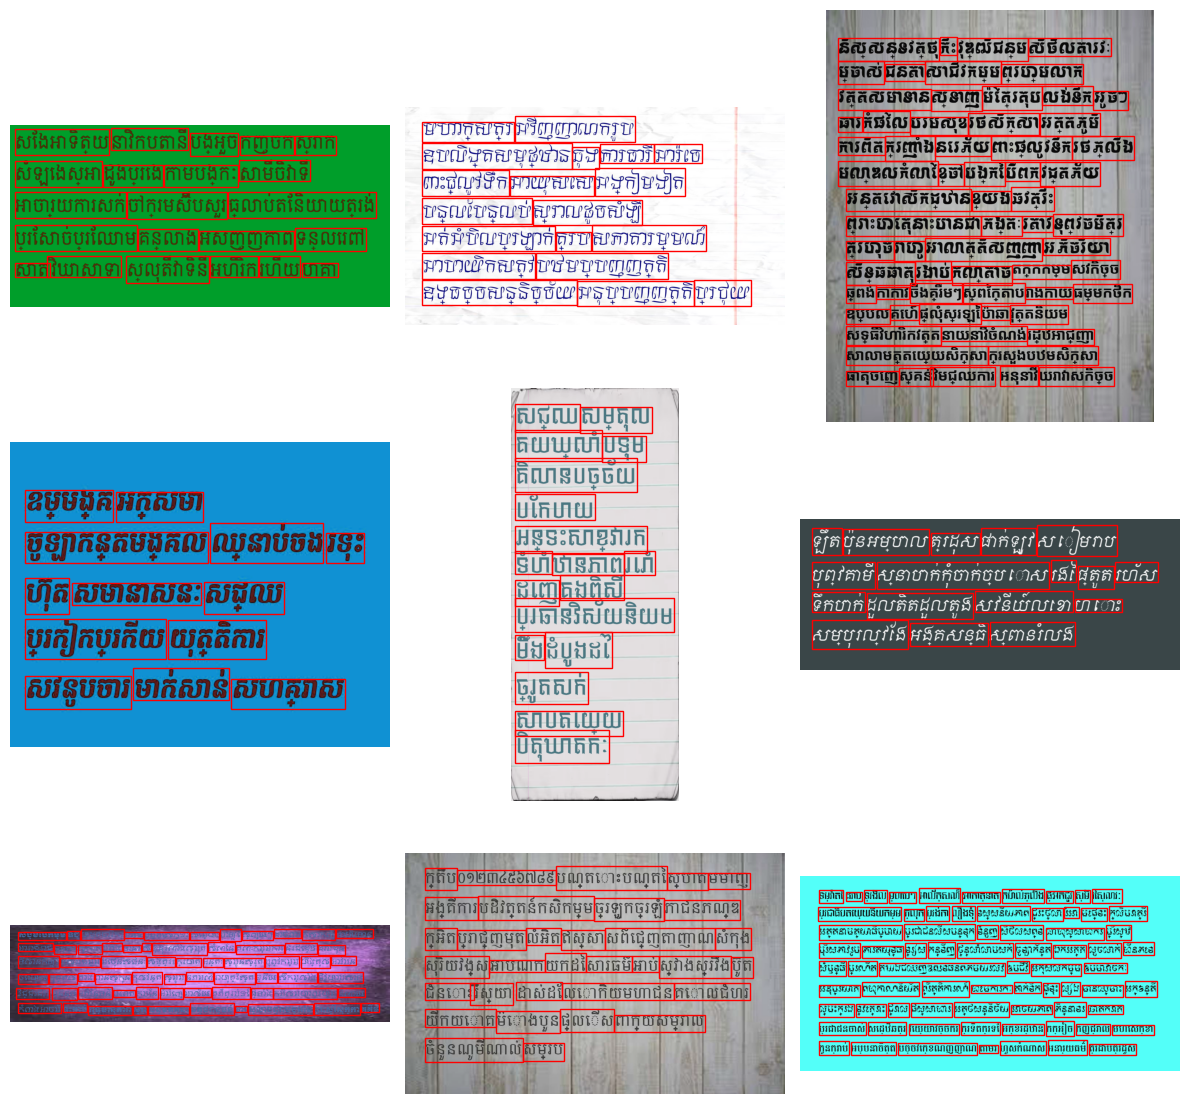

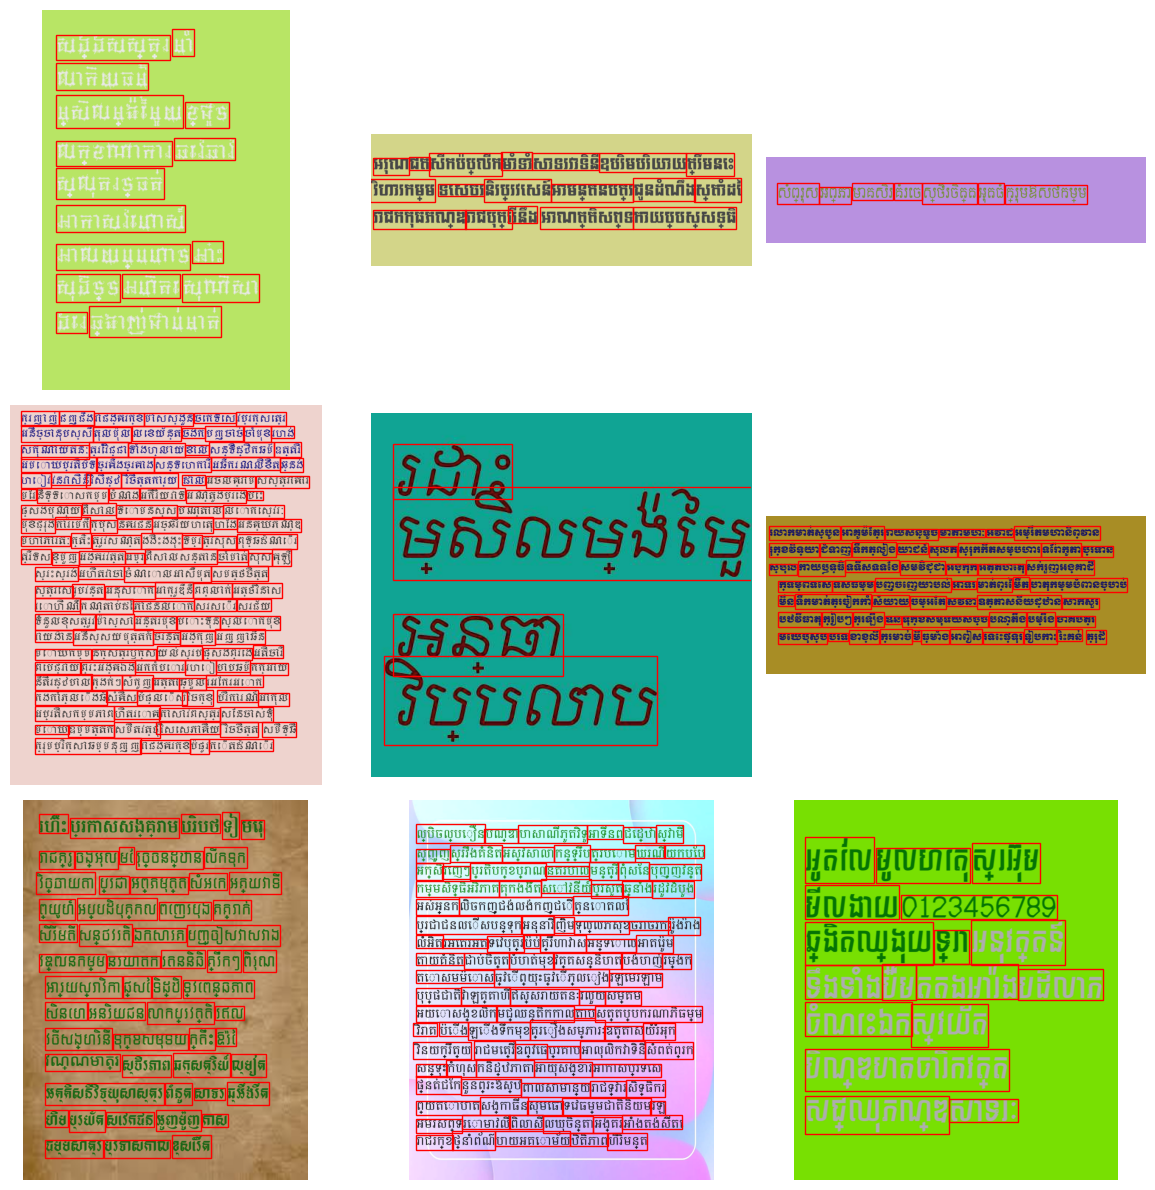

In [3]:
# Example usage
image_dir = "synthetic_images"
label_dir = "synthetic_labels"
xml_label_dir = "synthetic_xml_labels"
for i in range(0, 10, 9):
    display_images_in_grid_xml(image_dir, xml_label_dir, start_index=i)
    # display_images_in_grid_txt(image_dir, label_dir, start_index=i)
# display_images_in_grid_txt(image_dir, label_dir, start_index=0)
